        date                                               text    source  \
0 2025-01-10  The new distance-based fare makes short trips ...   Twitter   
1 2025-01-12  This system is confusing and unfair. I pay mor...    Reddit   
2 2025-01-15  Can someone explain how it works? Seems compli...  Facebook   
3 2025-01-20        It’s okay but not great for long commuters.    Survey   
4 2025-01-25  Good initiative, but implementation needs impr...   Twitter   

  sentiment  
0  Positive  
1  Negative  
2  Negative  
3   Neutral  
4  Positive  


<Figure size 1000x600 with 0 Axes>

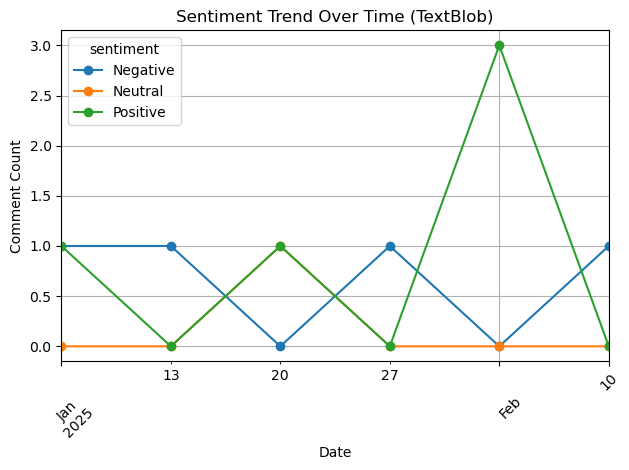

In [4]:
# Fallback: Using TextBlob for sentiment analysis instead of VADER

from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("../data/fare_sentiment_sample.csv")

# Apply sentiment analysis using TextBlob
def classify_sentiment_blob(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity >= 0.05:
        return "Positive"
    elif polarity <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["text"].apply(classify_sentiment_blob)
df["date"] = pd.to_datetime(df["date"])

# Group by week and sentiment
sentiment_over_time = df.groupby([df["date"].dt.to_period("W"), "sentiment"]).size().unstack(fill_value=0)
sentiment_over_time.index = sentiment_over_time.index.to_timestamp()

# OPTIONAL: Preview the processed data
print(df.head())

# Plot sentiment trend
plt.figure(figsize=(10, 6))
sentiment_over_time.plot(marker='o')
plt.title("Sentiment Trend Over Time (TextBlob)")
plt.xlabel("Date")
plt.ylabel("Comment Count")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
# ====================================
# FareReformInsights – Sentiment Analysis Script
# ====================================

import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# ------------------------------------
# 1. Load Dataset
# ------------------------------------
df = pd.read_csv("../data/fare_sentiment_sample.csv")
df["date"] = pd.to_datetime(df["date"])


# ------------------------------------
# 2. Sentiment Analysis using TextBlob
# ------------------------------------
def classify_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity >= 0.05:
        return "Positive"
    elif polarity <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["text"].apply(classify_sentiment)


# ------------------------------------
# 3. Subjectivity Score & Flagging
# ------------------------------------
df["subjectivity"] = df["text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df["flagged"] = df["subjectivity"] > 0.85  # High subjectivity = potentially misleading


<Figure size 1000x600 with 0 Axes>

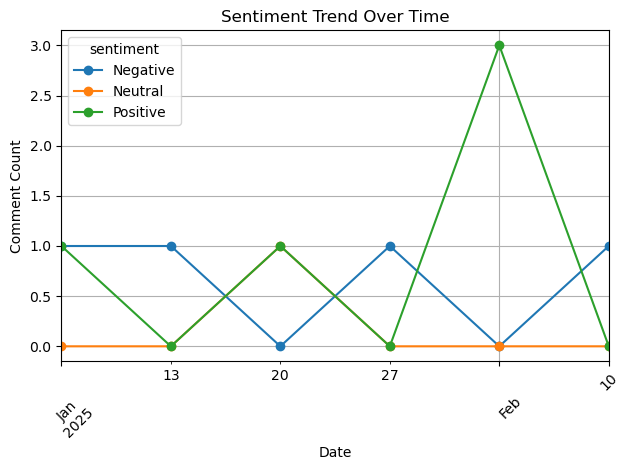

In [10]:
# ------------------------------------
# 4. Sentiment Trend Over Time
# ------------------------------------
sentiment_over_time = df.groupby([df["date"].dt.to_period("W"), "sentiment"]).size().unstack(fill_value=0)
sentiment_over_time.index = sentiment_over_time.index.to_timestamp()

plt.figure(figsize=(10, 6))
sentiment_over_time.plot(marker='o')
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Comment Count")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

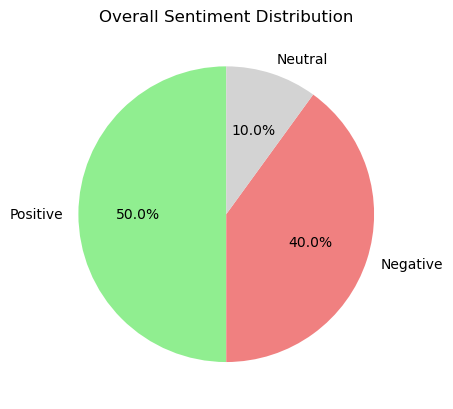

In [11]:

# ------------------------------------
# 5. Sentiment Distribution Pie Chart
# ------------------------------------
df["sentiment"].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightgreen', 'lightcoral', 'lightgrey']
)
plt.title("Overall Sentiment Distribution")
plt.ylabel('')
plt.show()


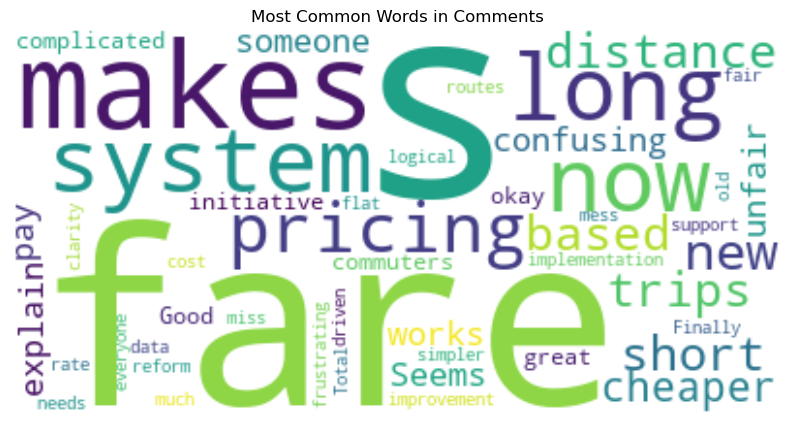

In [12]:
# ------------------------------------
# 6. Word Cloud of Common Terms
# ------------------------------------
text = ' '.join(df["text"].dropna().tolist())
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=100).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Comments")
plt.show()

In [13]:

# ------------------------------------
# 7. Sample Comments & Flags
# ------------------------------------
print("\n🔹 Top 3 Positive Comments:")
print(df[df["sentiment"] == "Positive"]["text"].head(3).to_string(index=False))

print("\n🔸 Top 3 Negative Comments:")
print(df[df["sentiment"] == "Negative"]["text"].head(3).to_string(index=False))

print("\n⚠️ Flagged Comments with High Subjectivity:")
print(df[df["flagged"]][["date", "text"]].to_string(index=False))



🔹 Top 3 Positive Comments:
The new distance-based fare makes short trips c...
Good initiative, but implementation needs impro...
Finally a system that makes pricing fair for ev...

🔸 Top 3 Negative Comments:
This system is confusing and unfair. I pay more...
Can someone explain how it works? Seems complic...
  Long routes now cost too much. It’s frustrating.

⚠️ Flagged Comments with High Subjectivity:
      date                                                   text
2025-01-15   Can someone explain how it works? Seems complicated.
2025-02-03 Finally a system that makes pricing fair for everyone.
